# DATA VISUALIZATION

- Scatter plot
- Bar plot
- Pie plot

In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [91]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4. Scatter Plot

Melihat hubungan antara 2 variabel numerikal

### a. Scatter Plot dengan Matplotlib

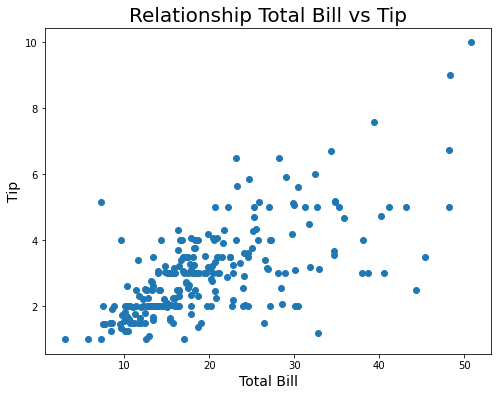

In [92]:
plt.figure(figsize=(8,6))

plt.scatter(x=tips['total_bill'], y=tips['tip'])

plt.xlabel('Total Bill', size=14)
plt.ylabel('Tip', size=14)
plt.title('Relationship Total Bill vs Tip', size=20)

plt.show()

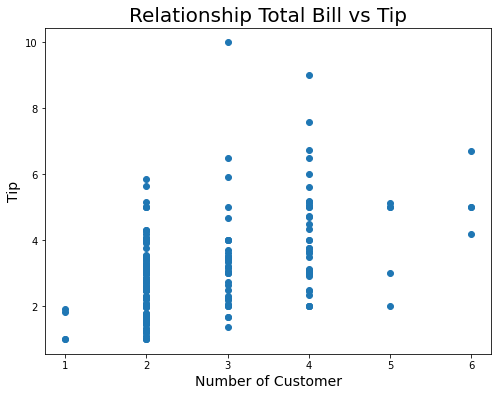

In [93]:
plt.figure(figsize=(8,6))

plt.scatter(x=tips['size'], y=tips['tip'])

plt.xlabel('Number of Customer', size=14)
plt.ylabel('Tip', size=14)
plt.title('Relationship Total Bill vs Tip', size=20)

plt.show()

### b. Scatter Plot dengan Seaborn

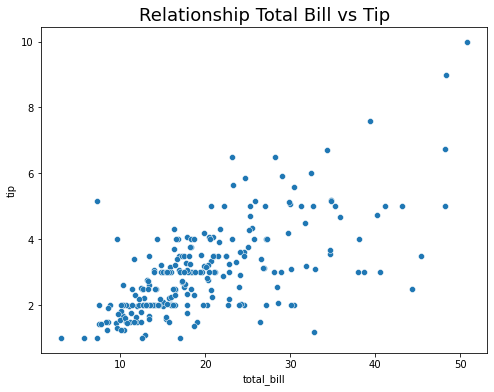

In [94]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=tips, x='total_bill', y='tip')

plt.title('Relationship Total Bill vs Tip', size=18)
plt.show()

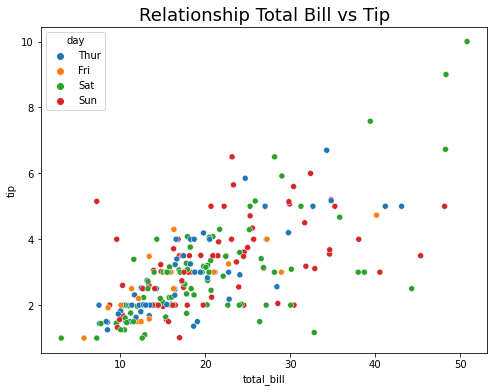

In [95]:
plt.figure(figsize=(8,6))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day')

plt.title('Relationship Total Bill vs Tip', size=18)
plt.show()

### c. Scatter Plot dengan Pandas

<Figure size 576x432 with 0 Axes>

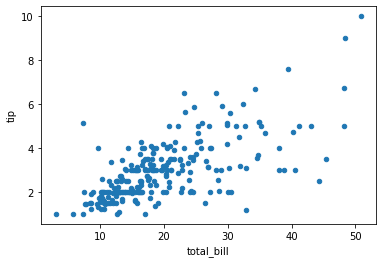

In [96]:
plt.figure(figsize=(8,6))

tips.plot(x='total_bill', y='tip', kind='scatter')

plt.show()

## 5. Bar Plot

- var Numerical vs var Categorical
- Membandingkan nilai antara 2 kategori atau lebih
- Nilai yang dibandingkan bisa berupa mean, median, sum, dll.

### a. Bar Plot dengan Matplotlib

In [97]:
# Rata rata total bill per hari
df_totalbill_by_day = tips.groupby('day').mean()[['total_bill']].reset_index()
df_totalbill_by_day

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


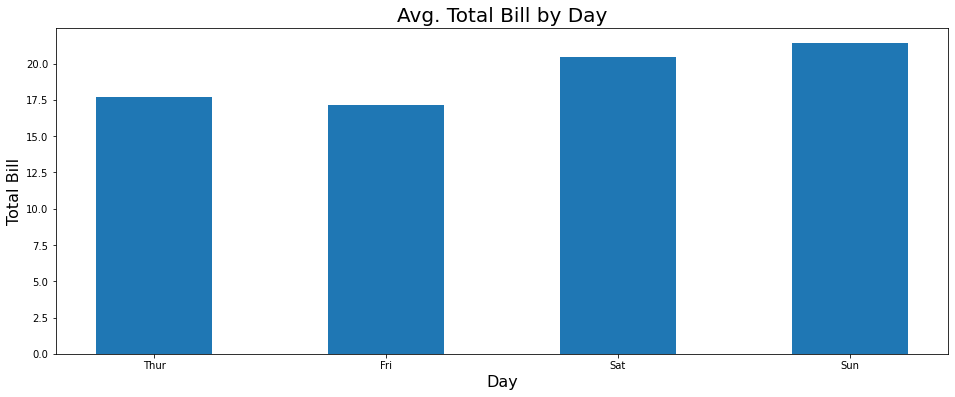

In [98]:
plt.figure(figsize=(16,6))

plt.bar(df_totalbill_by_day['day'], df_totalbill_by_day['total_bill'], width=0.5)

plt.xlabel('Day', size=16)
plt.ylabel('Total Bill', size=16)
plt.title('Avg. Total Bill by Day', size=20)

plt.show()

### b. Bar Plot dengan Seaborn

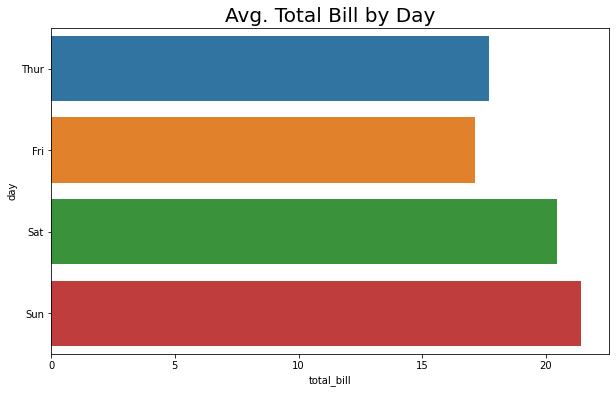

In [99]:
plt.figure(figsize=(10,6))

sns.barplot(data=tips, x='total_bill', y='day', ci=0, estimator=np.mean)

plt.title('Avg. Total Bill by Day', size=20)
plt.show()

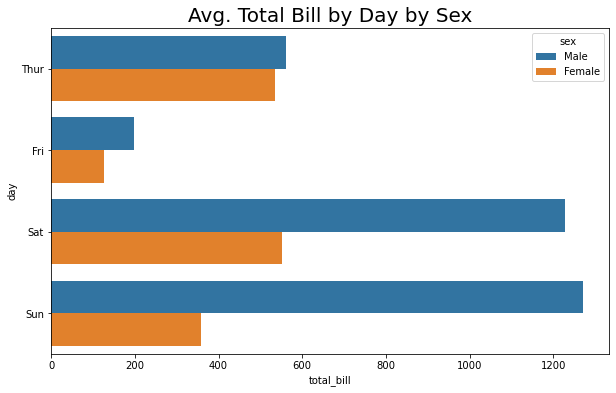

In [107]:
plt.figure(figsize=(10,6))

sns.barplot(data=tips, x='total_bill', y='day', hue='sex' , ci=0, estimator=np.sum)

plt.title('Avg. Total Bill by Day by Sex', size=20)
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

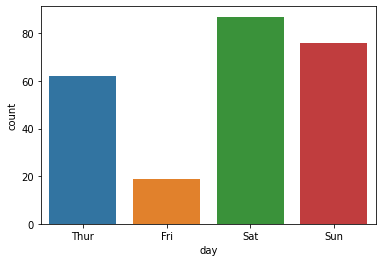

In [101]:
# Count plot: Membandingkan frequensi data pada 2 kelompok atau lebih

sns.countplot(data=tips, x='day')

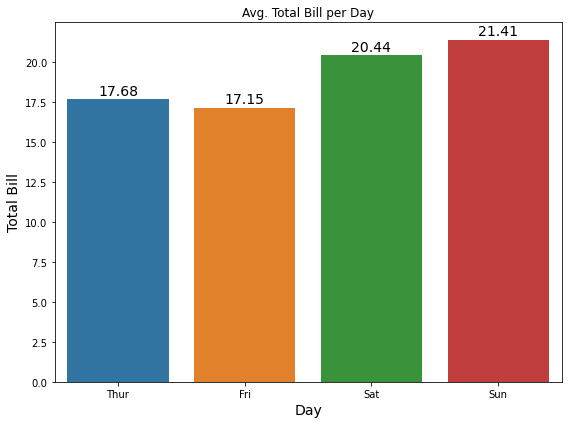

In [182]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x="day", y="total_bill", data=tips, ci=0)

# Iterrating over the bars one-by-one
for bar in ax.patches:

    # Using Matplotlib's annotate function and passing the coordinates where the annotation shall be done   
	ax.annotate(format(bar.get_height(), '.2f'),          # text yang ditampilkan
               (bar.get_x() + bar.get_width()/2,          # x-coordinate: bar.get_x() + bar.get_width() / 2
                bar.get_height()),                        # y-coordinate: bar.get_height()
               ha='center',                               # ha and va stand for the horizontal and vertical alignment
               va='center',
               size=14, 
               xytext=(0, 8),                             # free space to be left to make graph pleasing: (0, 8)
               textcoords='offset points')

plt.xlabel("Day", size=14)
plt.ylabel("Total Bill", size=14)
plt.title("Avg. Total Bill per Day")
plt.tight_layout()
plt.show()


In [170]:
ax.patches[0].get_x()

-0.4

In [171]:
ax.patches[0].get_width()


0.8

### c. Bar Plot dengan Pandas

In [102]:
# Rata rata total bill per hari
df_totalbill_by_day = tips.groupby('day').mean()[['total_bill']].reset_index()
df_totalbill_by_day

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


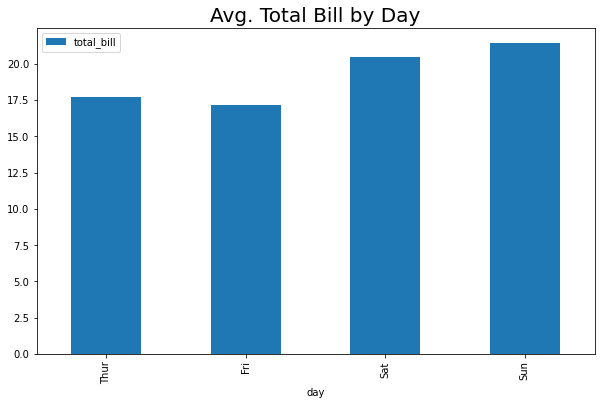

In [103]:
# Barplot
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
df_totalbill_by_day.plot(x='day', y='total_bill', kind='bar', ax=ax1)

plt.title('Avg. Total Bill by Day', size=20)
plt.show()

In [104]:
# Jumlah transaksi per hari
df_freq_per_day = tips.groupby('day').count()[['tip']].reset_index()
df_freq_per_day

,day,tip
0,Thur,62
1,Fri,19
2,Sat,87
3,Sun,76


In [105]:
tips['day'].value_counts().to_frame()

,day
Sat,87
Sun,76
Thur,62
Fri,19


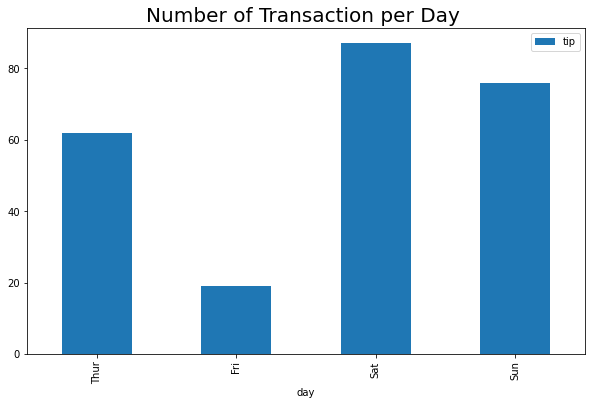

In [106]:
fig = plt.figure(figsize=(10,6))

ax1 = fig.add_subplot(111)
df_freq_per_day.plot(x='day', y='tip', kind='bar', ax=ax1)

plt.title('Number of Transaction per Day ', size=20)
plt.show()

## 6. Pie Chart

- Menggambarkan proporsi/persentase dari beberapa kelompok
- Usahakan hindari menggunakan pie chart, kita bisa gunakan bar plot

In [114]:
# total pemasukan dari seluruh transaksi 
total_all = tips['total_bill'].sum()
total_all

4827.77

In [113]:
df_sum_bill = tips.groupby('day').sum()['total_bill'].reset_index()
df_sum_bill

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


In [116]:
df_sum_bill['bill_percent'] = df_sum_bill['total_bill'] / total_all * 100
df_sum_bill

,day,total_bill,bill_percent
0,Thur,1096.33,22.708828
1,Fri,325.88,6.750114
2,Sat,1778.40,36.836883
3,Sun,1627.16,33.704174


### a. Pie Chart dengan Matplotlib

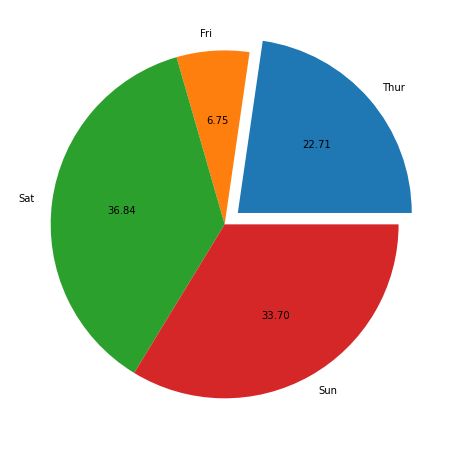

In [132]:
plt.figure(figsize=(8,8))

plt.pie(
    x=df_sum_bill['total_bill'], 
    labels=df_sum_bill['day'],
    autopct= f'%.2f',
    explode = (0.1, 0, 0, 0)
    )

plt.show()

<BarContainer object of 4 artists>

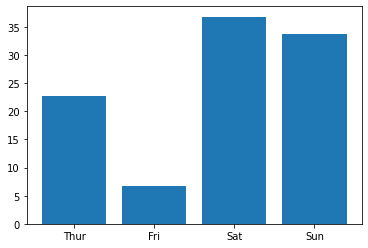

In [135]:
plt.bar(df_sum_bill['day'], df_sum_bill['bill_percent'])

### b. Pie Chart dengan Pandas 

In [147]:
total_all

4827.77

In [139]:
df_sum_bill

,day,total_bill,bill_percent
0,Thur,1096.33,22.708828
1,Fri,325.88,6.750114
2,Sat,1778.40,36.836883
3,Sun,1627.16,33.704174


<AxesSubplot:ylabel='day'>

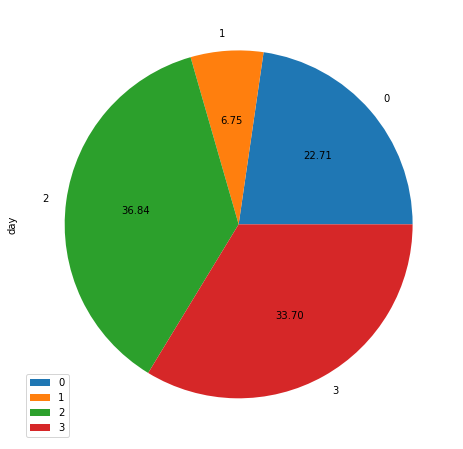

In [146]:
df_sum_bill.plot(
    y='total_bill', 
    kind='pie',
    autopct = '%.2f',
    figsize=(8,8)
    )

## 7. Heatmap

- Warna menunjukkan intensitas nilai
- Biasanya warna yang lebih gelap menunjukkan nilai yang lebih besar

In [149]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [152]:
# correlation 
corr_matrix = tips.corr()
corr_matrix

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


### a. Heatmap dengan Matplotlib

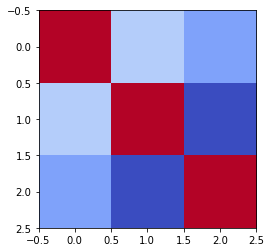

In [155]:
plt.imshow(corr_matrix, cmap='coolwarm')

### b. Heatmap dengan Seaborn

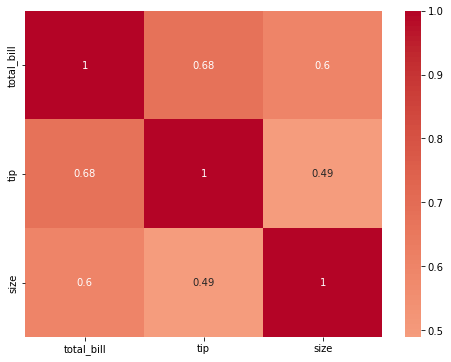

In [165]:
plt.figure(figsize=(8,6))

sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', annot=True)

plt.show()